## Working with DGGRID in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/09_dggrid.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/09_dggrid.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/09_dggrid.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/09_dggrid.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [ ]:
# %pip install vgrid --upgrade

### Download a portable version of DGGRID and start a DGGRID instance

In [ ]:
from dggrid4py import tool, DGGRIDv8

dggrid_exec = tool.get_portable_executable(".")

dggrid_instance = DGGRIDv8(
    executable=dggrid_exec,
    working_dir=".",
    capture_logs=False,
    silent=True,
    has_gdal=False,
    tmp_geo_out_legacy=True,
    debug=False,
)

### latlon2dggrid

In [ ]:
from vgrid.conversion.latlon2dggs import latlon2dggrid

dggs_type = "ISEA3H"  # choose one from ['CUSTOM', 'SUPERFUND', 'PLANETRISK', 'ISEA3H', 'ISEA4H', 'ISEA4T', 'ISEA4D', 'ISEA43H', 'ISEA7H', 'IGEO7', 'FULLER3H', 'FULLER4H', 'FULLER4T', 'FULLER4D', 'FULLER43H', 'FULLER7H']
resolution = 18
address_type = "Z3_STRING"
# "Q2DI",  # quad number and (i, j) coordinates on that quad
# "SEQNUM",  # DGGS index - linear address (1 to size-of-DGG), not supported for parameter input_address_type if dggs_aperture_type is SEQUENCE
# "PLANE",  # (x, y) coordinates on unfolded ISEA plane,  only supported for parameter output_address_type;
# "Q2DD",  # quad number and (x, y) coordinates on that quad
# "PROJTRI",  # PROJTRI - triangle number and (x, y) coordinates within that triangle on the ISEA plane
# "VERTEX2DD",  # vertex number, triangle number, and (x, y) coordinates on ISEA plane
# "Z3",  # hexadecimal characters index system Z3 especially usefull for ISEA3H
# "Z3_STRING",  # numerical digits representation of Z3 (as characters, not an integer)
# "Z7",  # hexadecimal characters index system Z7 especially usefull for ISEA7H, also in preset IGEO7
# "Z7_STRING",  # numerical digits representation of Z7 (as characters, not an integer)
# "ZORDER",  # index system ZORDER especially usefull for ISEA3H, ISEA4H and mixed aperture
# "ZORDER_STRING",  # numerical digits representation of ZORDER (as characters, not an integer)
dggrid_id = latlon2dggrid(
    dggrid_instance, dggs_type, 10.775276, 106.706797, resolution, address_type
)
dggrid_id

'09210010001220222111'

### DGGRID to Polygon (GeoDataFrame)

In [ ]:
from vgrid.conversion.dggs2geo.dggrid2geo import dggrid2geo

dggrid_geo = dggrid2geo(dggrid_instance, dggs_type, dggrid_id, resolution, address_type)
dggrid_geo

dggrid_isea3h                                           geometry  \
0  09210010001220222111  POLYGON ((106.70881 10.7739, 106.70765 10.7722...   

   resolution  
0          18

### DGGRID to GeoJSON

In [ ]:
from vgrid.conversion.dggs2geo.dggrid2geo import dggrid2geojson

dggrid_geojson = dggrid2geojson(
    dggrid_instance, dggs_type, dggrid_id, resolution, address_type
)
# dggrid_geojson

### Point to DGGRID

Processing features: 100%|██████████| 15/15 [00:01<00:00,  8.50it/s]


<Axes: >

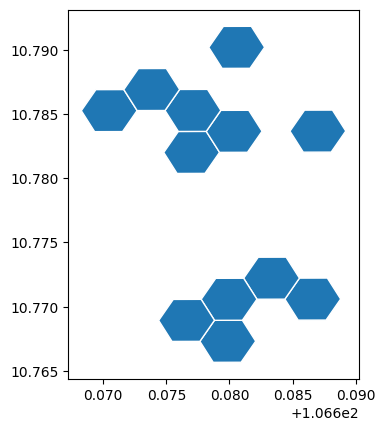

In [ ]:
from vgrid.conversion.vector2dggs.vector2dggrid import vector2dggrid

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/point.geojson"
)
dggs_type = "ISEA3H"  # choose one from ['CUSTOM', 'SUPERFUND', 'PLANETRISK', 'ISEA3H', 'ISEA4H',
# 'ISEA4T', 'ISEA4D', 'ISEA43H', 'ISEA7H', 'IGEO7', 'FULLER3H', 'FULLER4H', 'FULLER4T', 'FULLER4D', 'FULLER43H', 'FULLER7H']
resolution = 18
vector_to_dggrid = vector2dggrid(
    dggrid_instance,
    dggs_type,
    file_path,
    resolution=resolution,
    compact=False,
    predicate="intersects",
    output_address_type=address_type,
    output_format="gpd",
)
# Visualize the output
# vector_to_dggrid.head()
vector_to_dggrid.plot(edgecolor="white")

### DGGRID Generator

<Axes: >

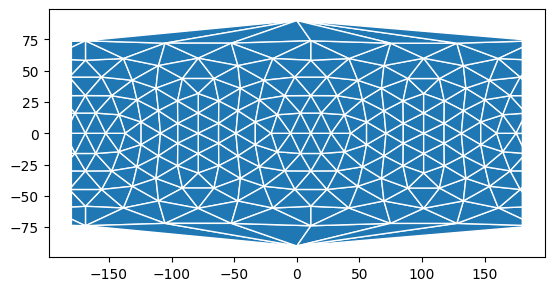

In [ ]:
from vgrid.generator.dggridgen import dggridgen

dggs_type = "ISEA4T"  # choose one from ['CUSTOM', 'SUPERFUND', 'PLANETRISK', 'ISEA3H', 'ISEA4H', 'ISEA4T',
# 'ISEA4D', 'ISEA43H', 'ISEA7H', 'IGEO7', 'FULLER3H', 'FULLER4H', 'FULLER4T', 'FULLER4D', 'FULLER43H', 'FULLER7H']
resolution = 2
# bbox = (10.762811, 106.699007, 10.778649, 106.717674)  # (min_lat, min_lon, max_lat, max_lon)
dggrid_gen = dggridgen(
    dggrid_instance, dggs_type=dggs_type, resolution=resolution, output_format="gpd"
)
# dggrid_gen
dggrid_gen.plot(edgecolor="white")

### DGGRID Inspect

In [ ]:
from vgrid.stats.dggridstats import dggridinspect

dggs_type = "ISEA4T"  # choose one from ['CUSTOM', 'SUPERFUND', 'PLANETRISK', 'ISEA3H', 'ISEA4H', 'ISEA4T',
# 'ISEA4D', 'ISEA43H', 'ISEA7H', 'IGEO7', 'FULLER3H', 'FULLER4H', 'FULLER4T', 'FULLER4D', 'FULLER43H', 'FULLER7H']
resolution = 3
dggrid_inspect = dggridinspect(dggrid_instance, dggs_type, resolution)
dggrid_inspect = dggrid_inspect[dggrid_inspect["crossed"] == False]

dggrid_inspect.head()

### DGGRID Normalized Area Histogram

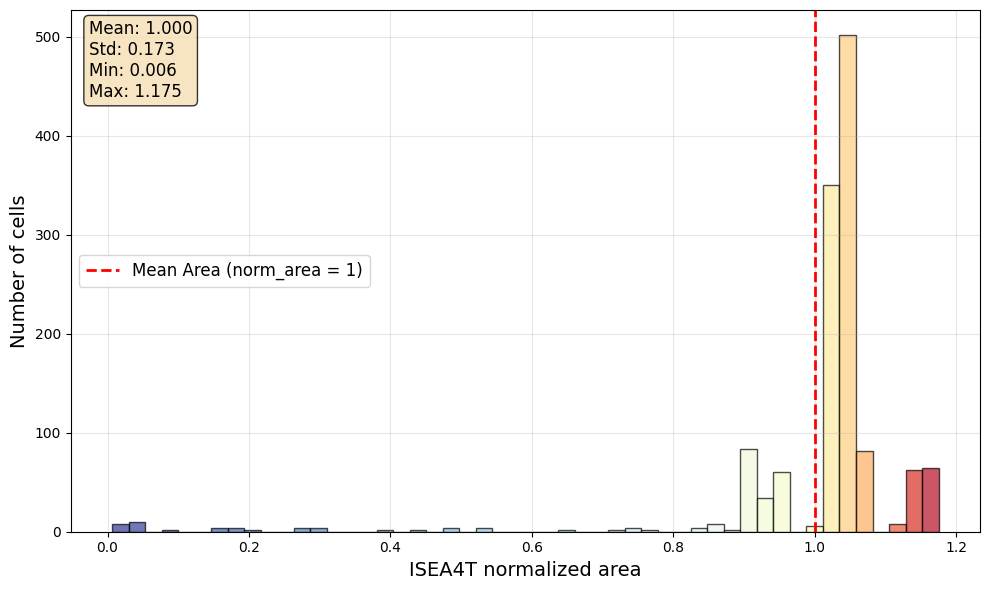

In [ ]:
from vgrid.stats.dggridstats import dggrid_norm_area_hist

dggrid_norm_area_hist(dggs_type, dggrid_inspect)

### Distribution of DGGRID Area Distortions

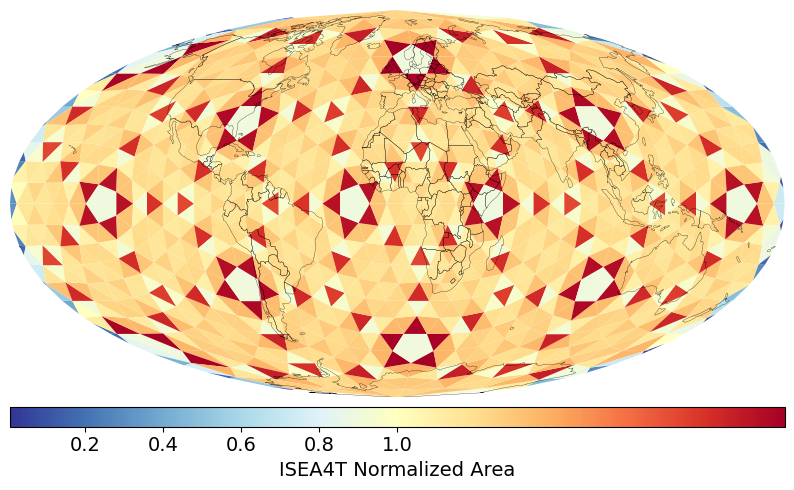

In [ ]:
from vgrid.stats.dggridstats import dggrid_norm_area

dggrid_norm_area(dggs_type, dggrid_inspect, crs="proj=moll")

### DGGRID IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1].

A circle represents the maximum compactness with a value of 1.

As shapes become more irregular or elongated, their compactness decreases toward 0.


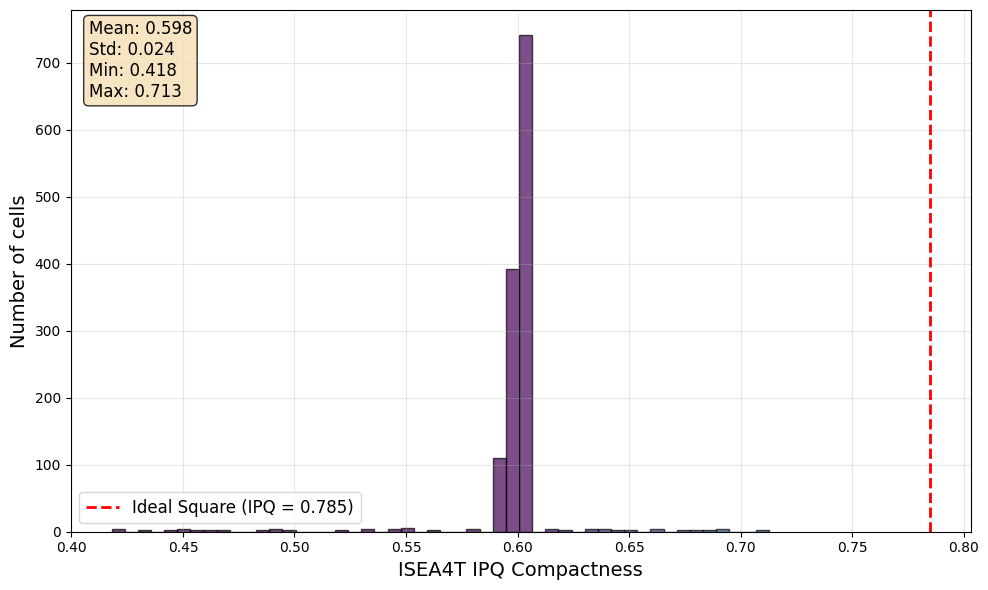

In [ ]:
from vgrid.stats.dggridstats import dggrid_compactness_ipq_hist

dggrid_compactness_ipq_hist(dggs_type, dggrid_inspect)

### Distribution of DGGRID IPQ Compactness

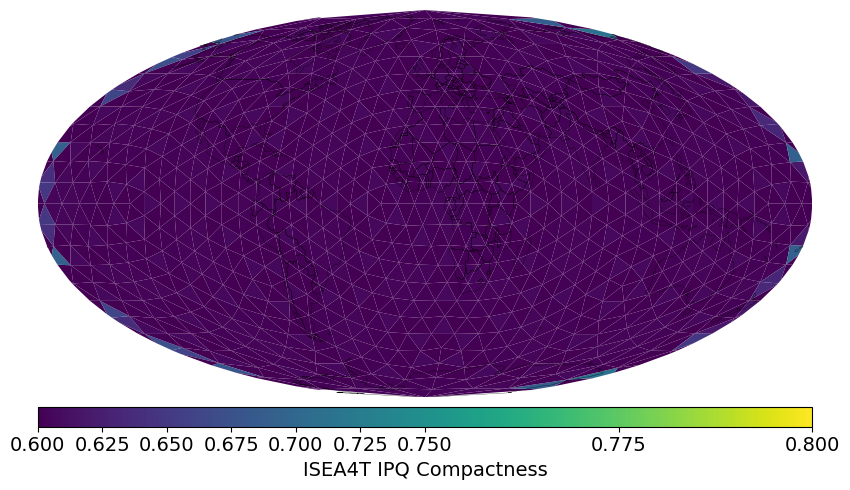

In [ ]:
from vgrid.stats.dggridstats import dggrid_compactness_ipq

dggrid_compactness_ipq(dggs_type, dggrid_inspect, crs="proj=moll")

### DGGRID Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1].

As shapes become more concave, their convex hull compactness decreases toward 0.

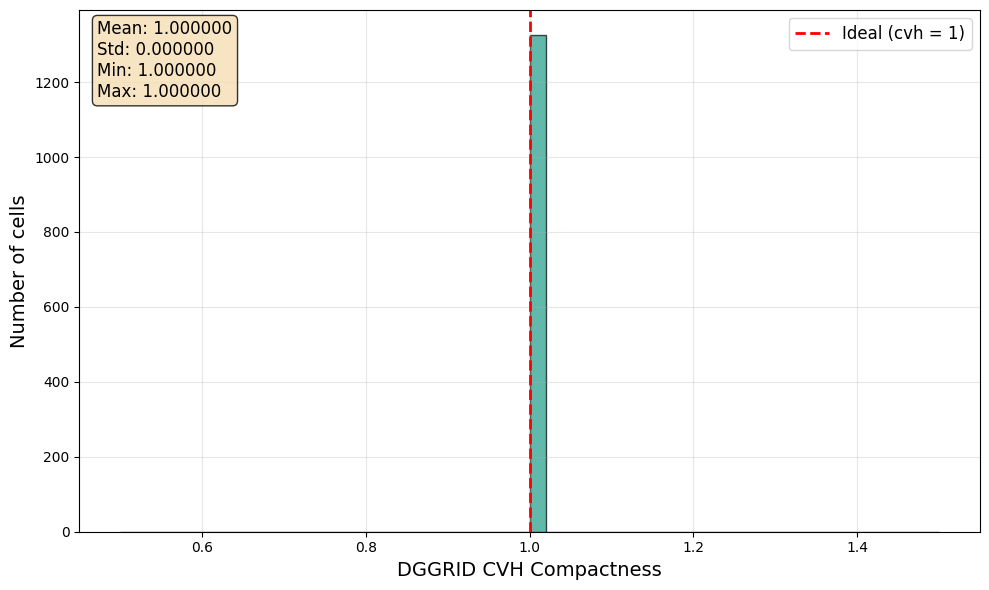

In [ ]:
from vgrid.stats.dggridstats import dggrid_compactness_cvh_hist

dggrid_compactness_cvh_hist(dggs_type, dggrid_inspect)

### Distribution of DGGRID Convex hull Compactness

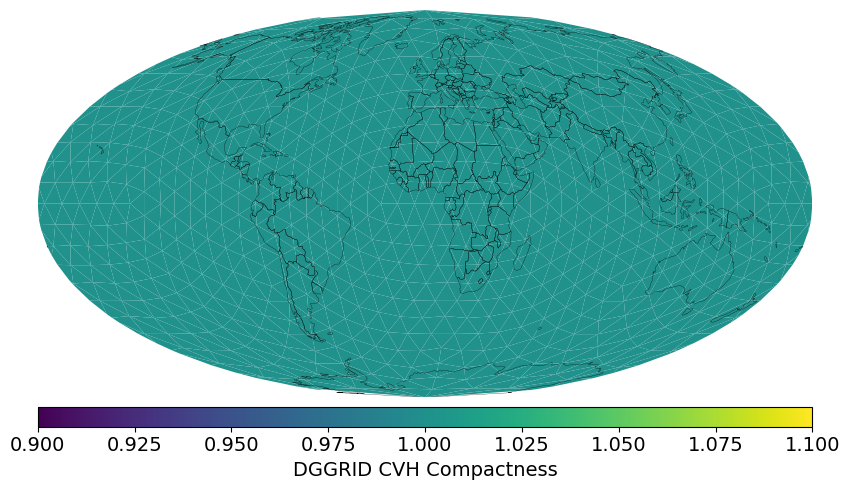

In [ ]:
from vgrid.stats.dggridstats import dggrid_compactness_cvh

dggrid_compactness_cvh(dggs_type, dggrid_inspect)

### DGGRID Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [ ]:
from vgrid.stats.dggridstats import dggridstats

dggs_type = "FULLER7H"  # choose one from ['CUSTOM', 'SUPERFUND', 'PLANETRISK', 'ISEA3H', 'ISEA4H', 'ISEA4T',
# 'ISEA4D', 'ISEA43H', 'ISEA7H', 'IGEO7', 'FULLER3H', 'FULLER4H', 'FULLER4T', 'FULLER4D', 'FULLER43H', 'FULLER7H']
dggrid_stats = dggridstats(dggrid_instance, dggs_type, "km")
dggrid_stats

resolution      number_of_cells      area_km2       cls_km  intercell_km
0            0                   12  5.100656e+07  8199.500370   7053.652431
1            1                   72  7.286652e+06  3053.223243   2666.030024
2            2                  492  1.040950e+06  1151.643010   1007.664633
3            3                 3432  1.487072e+05   435.153149    380.861432
4            4                24012  2.124388e+04   164.465580    143.952090
5            5               168072  3.034840e+03    62.161776     54.408776
6            6              1176492  4.335486e+02    23.494923     20.564584
7            7              8235432  6.193552e+01     8.880245      7.772682
8            8             57648012  8.847931e+00     3.356417      2.937798
9            9            403536072  1.263990e+00     1.268606      1.110383
10          10           2824752492  1.805700e-01     0.479488      0.419685
11          11          19773267432  2.579570e-02     0.181229      0.158626
12          12         138412872012  3.685100e-03     0.068498      0.059955
13          13         968890104072  5.264000e-04     0.025890      0.022661
14          14        6782230728492  7.520000e-05     0.009786      0.008565
15          15       47475615099432  1.070000e-05     0.003699      0.003237
16          16      332329305696012  1.500000e-06     0.001398      0.001224
17          17     2326305139872072  2.000000e-07     0.000528      0.000462
18          18    16284135979104492  0.000000e+00     0.000200      0.000175
19          19   113988951853731424  0.000000e+00     0.000076      0.000066
20          20   797922662976120064  0.000000e+00     0.000029      0.000025
21          21  5585458640832839680  0.000000e+00     0.000011      0.000009